# Import statements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Connecting to google drive and dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


link to dataset used: https://www.kaggle.com/datasets/bumba5341/advertisingcsv

In [ ]:
filepath = "/content/drive/MyDrive/practise/Advertising.csv"
df = pd.read_csv(filepath)

# First Look at dataset

* Checking for Null values
* Size of the dataset

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df = df.drop("Unnamed: 0", axis=1)

In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
df.shape

(200, 4)

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visualising data

<Axes: xlabel='Sales', ylabel='Count'>

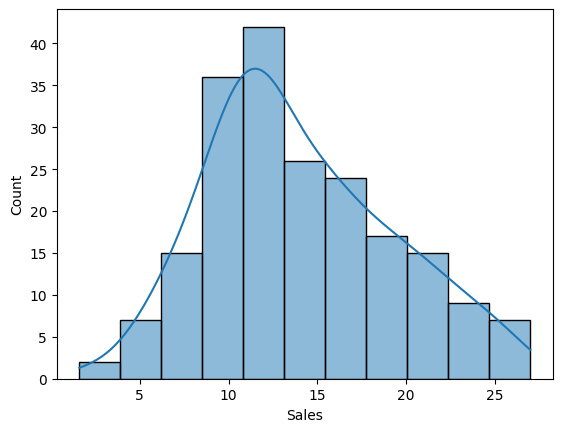

In [ ]:
sns.histplot(df['Sales'], kde = True) # kde - kernel density estimate

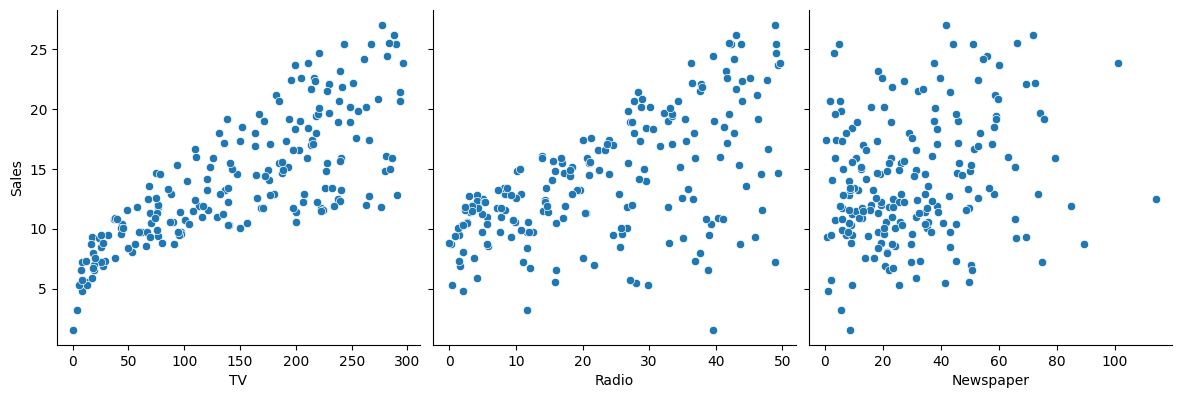

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

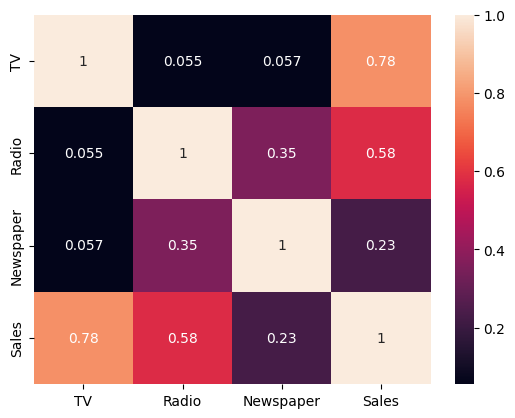

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

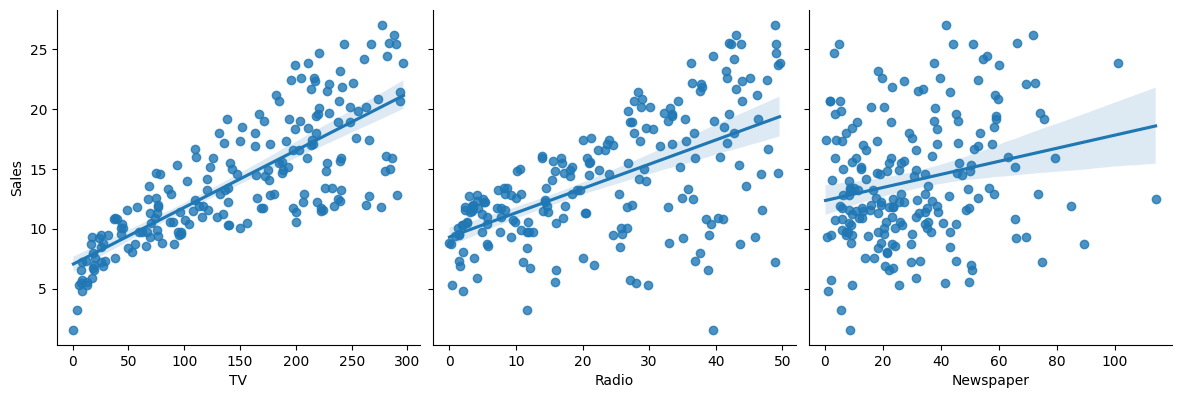

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='reg')
plt.show()

# Single Linear Regression

In [ ]:
model = LinearRegression()

In [ ]:
X_tv = df[['TV']]
y_tv = df['Sales']
X_tv, X_test, y_tv, y_test = train_test_split(X_tv, y_tv, test_size = 0.3, random_state = 100)

In [ ]:
model.fit(X_tv, y_tv)

LinearRegression()

In [ ]:
pred_tv = model.predict(X_test)

In [ ]:
pred_tv[:5]

array([ 7.35234526, 18.06533671, 13.27610876, 17.11214086, 18.22807747])

In [ ]:
r2 = model.score(X_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.5942987267783302


In [ ]:
diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': pred_tv})
diff['Error'] = diff['Actual Value'] - diff['Predicted Value']
diff = diff.sort_values('Error').reset_index()

In [ ]:
print("\nSimple Linear Regression with TV as predictor")
print(diff.head())


Simple Linear Regression with TV as predictor
   index  Actual Value  Predicted Value     Error
0    174          11.5        17.330678 -5.830678
1    181          12.2        17.149339 -4.949339
2     96          11.7        16.177544 -4.477544
3    167          12.2        16.605320 -4.405320
4    177          11.7        14.903516 -3.203516


In [ ]:
z_scores = (diff['Error'] - diff['Error'].mean()) / diff['Error'].std()

Text(0, 0.5, 'Ordered Values')

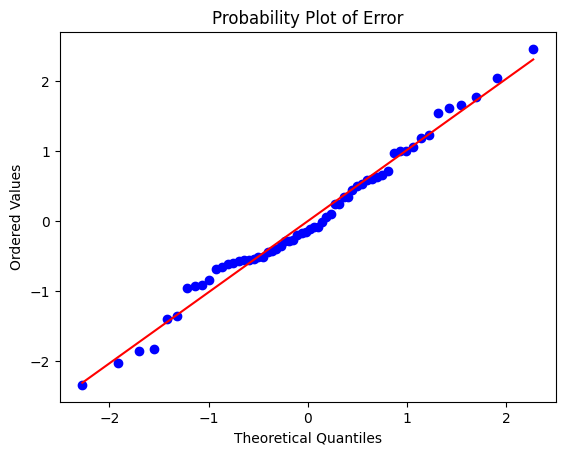

In [ ]:
stats.probplot(z_scores, dist="norm", plot=plt)
plt.title('Probability Plot of Error')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

In [ ]:
X_radio = df[['Radio']]
y_radio = df['Sales']
X_radio, X_test, y_radio, y_test = train_test_split(X_radio, y_radio, test_size = 0.3, random_state = 100)

In [ ]:
model.fit(X_radio, y_radio)

LinearRegression()

In [ ]:
pred_radio = model.predict(X_test)

In [ ]:
pred_radio[:5]

array([17.06970981, 16.14477437, 17.63271399, 15.98391604, 16.88874418])

In [ ]:
r2 = model.score(X_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.4207007355904727


In [ ]:
diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': pred_radio})
diff['Error'] = diff['Actual Value'] - diff['Predicted Value']
diff = diff.sort_values('Error').reset_index()

In [ ]:
print("\nSimple Linear Regression with TV as predictor")
print(diff.head())


Simple Linear Regression with TV as predictor
   index  Actual Value  Predicted Value      Error
0    126           6.6        17.069710 -10.469710
1     75           8.7        18.034860  -9.334860
2    136           9.5        17.089817  -7.589817
3      1          10.4        17.150139  -6.750139
4     83          13.6        18.195718  -4.595718


In [ ]:
z_scores = (diff['Error'] - diff['Error'].mean()) / diff['Error'].std()

Text(0, 0.5, 'Ordered Values')

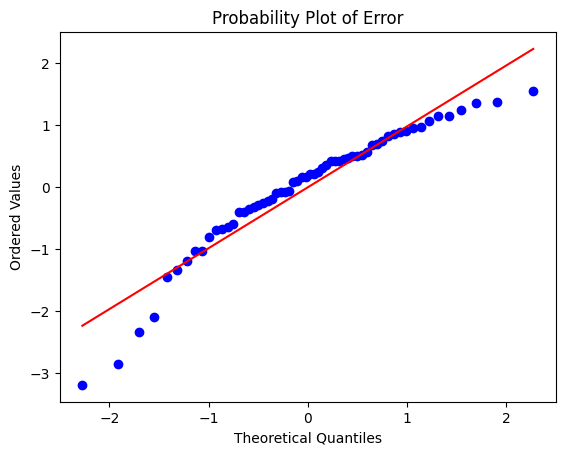

In [ ]:
stats.probplot(z_scores, dist="norm", plot=plt)
plt.title('Probability Plot of Error')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

# Multiple Linear Regression

In [ ]:
X_train = df[['TV','Radio','Newspaper']]
y_train = df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.3, random_state=100)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred1 = model.predict(X_test)
y_pred2= model.predict(X_train)

In [ ]:
diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred1})
diff['Error'] = diff['Actual Value'] - diff['Predicted Value']
reg3_diff = diff.sort_values('Error').reset_index()
reg3_diff.head()

,index,Actual Value,Predicted Value,Error
0,126,6.6,10.621601,-4.021601
1,75,8.7,12.124410,-3.424410
2,174,11.5,13.460919,-1.960919
3,1,10.4,12.339306,-1.939306
4,136,9.5,11.259045,-1.759045


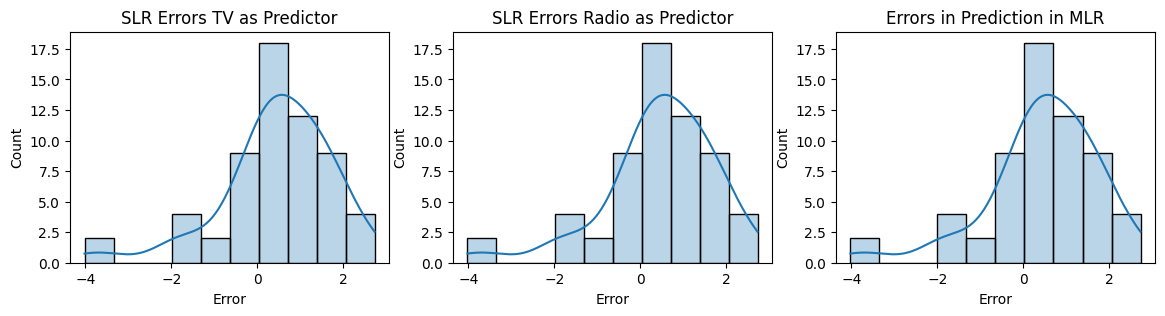

In [ ]:
plt.figure(figsize=(14,3))

plt.subplot(1,3,1)
plt.title('SLR Errors TV as Predictor', fontsize=12)
plt.ylabel('', fontsize=10)
sns.histplot(diff['Error'], kde = True, alpha=0.3);

plt.subplot(1,3,2)
plt.title('SLR Errors Radio as Predictor', fontsize=12)
plt.ylabel('', fontsize=10)
sns.histplot(diff['Error'], kde = True, alpha=0.3);

plt.subplot(1,3,3)
plt.title('Errors in Prediction in MLR', fontsize=12)
plt.ylabel('', fontsize=10)
sns.histplot(reg3_diff['Error'], kde = True, alpha=0.3);
# fig.tight_layout();